In [1]:
%matplotlib inline
%run utils.py
import os.path as osp
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotnine as pn
import matplotlib.pyplot as plt

In [2]:
df_pub = pd.read_csv(osp.join(DATA_DIR, 'pubmed_abstracts.csv'))
df_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52174 entries, 0 to 52173
Data columns (total 5 columns):
abstract    46582 non-null object
date        18497 non-null object
id          52174 non-null int64
terms       52174 non-null object
title       52172 non-null object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [3]:
df_pub['id'].nunique()

52174

In [4]:
df_ct = pd.read_csv(osp.join(DATA_DIR, 'pubmed_abstract_tcell_types.csv'))
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11524 entries, 0 to 11523
Data columns (total 6 columns):
type        11524 non-null object
count       11524 non-null int64
id          11524 non-null int64
type_key    7045 non-null object
type_lbl    7045 non-null object
type_lvl    7045 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 540.3+ KB


In [5]:
df_ct['id'].nunique()

8545

In [6]:
df_pr = pd.read_csv(osp.join(DATA_DIR, 'pubmed_abstract_proteins_resolved.csv'))
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61175 entries, 0 to 61174
Data columns (total 8 columns):
id            61175 non-null int64
start         61175 non-null int64
end           61175 non-null int64
value         61175 non-null object
class         61175 non-null object
value_norm    61175 non-null object
value_lbl     61175 non-null object
value_sym     17228 non-null object
dtypes: int64(3), object(5)
memory usage: 3.7+ MB


In [7]:
df_pr['id'].nunique()

5474

In [8]:
df_fr = pd.read_csv(osp.join(DATA_DIR, 'pubmed_annotated_proteins.csv'))
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
exp_id           347 non-null object
exp_name         347 non-null object
investigators    323 non-null object
researchers      323 non-null object
pr_value_lbl     347 non-null object
exp_lbl          347 non-null object
exp_typ          347 non-null object
dtypes: object(7)
memory usage: 19.1+ KB


## Merge

In [9]:
df = pd.merge(
    df_ct.add_prefix('ct_').rename(columns={'ct_id': 'id'}),
    df_pr.add_prefix('pr_').rename(columns={'pr_id': 'id'}),
    on='id',
    how='inner'
)
# Remove rows where there is no cell type classification
df = df[df['ct_type_key'].notnull()]

df = pd.merge(
    df, df_pub.add_prefix('pub_').rename(columns={'pub_id': 'id'}), 
    on='id', how='inner'
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70544 entries, 0 to 70543
Data columns (total 17 columns):
ct_type          70544 non-null object
ct_count         70544 non-null int64
id               70544 non-null int64
ct_type_key      70544 non-null object
ct_type_lbl      70544 non-null object
ct_type_lvl      70544 non-null float64
pr_start         70544 non-null int64
pr_end           70544 non-null int64
pr_value         70544 non-null object
pr_class         70544 non-null object
pr_value_norm    70544 non-null object
pr_value_lbl     70544 non-null object
pr_value_sym     19677 non-null object
pub_abstract     70544 non-null object
pub_date         44385 non-null object
pub_terms        70544 non-null object
pub_title        70544 non-null object
dtypes: float64(1), int64(4), object(12)
memory usage: 9.7+ MB


In [10]:
df['id'].nunique()

5474

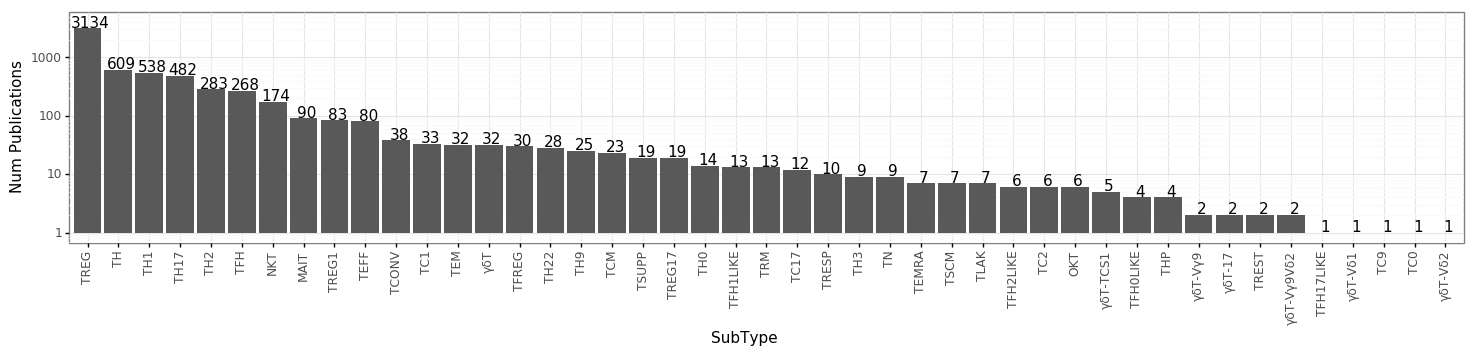

<ggplot: (284597028)>

In [11]:
# Number of documents per cell type
(
    pn.ggplot(
        df.groupby('ct_type_key')['id'].nunique().rename('count')
        .sort_values(ascending=False).reset_index()
        .assign(typ=lambda df: pd.Categorical(
            df['ct_type_key'], ordered=True,
            categories=df['ct_type_key'].unique()
        )),
        pn.aes(x='typ', y='count', label='count')
    ) + 
    pn.geom_bar(stat='identity') +
    pn.geom_text(nudge_y=.1, nudge_x=.1) +
    pn.labs(x='SubType', y='Num Publications') +
    pn.scale_y_log10() +
    pn.theme_bw() +
    pn.theme(figure_size=(18, 3), axis_text_x = pn.element_text(angle = 90, hjust = .5))
)


In [12]:
df['pr_value_lbl'].nunique()

5147

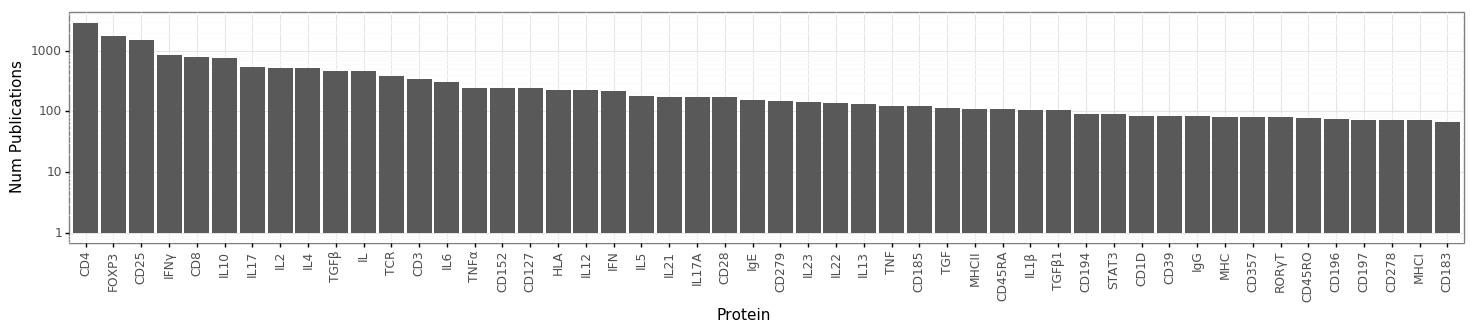

<ggplot: (-9223372036539097305)>

In [13]:
# Number of documents per protein
(
    pn.ggplot(
        df.groupby('pr_value_lbl')['id'].nunique().rename('count')
        .sort_values(ascending=False).head(50).reset_index()
        .assign(typ=lambda df: pd.Categorical(
            df['pr_value_lbl'], ordered=True,
            categories=df['pr_value_lbl'].unique()
        )),
        pn.aes(x='typ', y='count', label='count')
    ) + 
    pn.geom_bar(stat='identity') +
    pn.labs(x='Protein', y='Num Publications') +
    pn.scale_y_log10() +
    pn.theme_bw() +
    pn.theme(figure_size=(18, 3), axis_text_x = pn.element_text(angle = 90, hjust = .5))
)


In [15]:
df_pub.head()

,abstract,date,id,terms,title
0,Sodium chloride (NaCl) has been proposed as a ...,NaN,30554495,"Animals|Arthritis, Experimental/immunology/pat...",Sodium Chloride Aggravates Arthritis via Th17 ...
1,The severity of cryptococcosis in lupus from v...,2018-11-19,30456753,Animals|Cryptococcosis/etiology/genetics/immun...,Increased susceptibility against Cryptococcus ...
2,For efficacy of peptide vaccination immunother...,2018-12-01,30375705,Amino Acid Sequence|Antigen Presentation/immun...,Development of a T-cell receptor multimer with...
3,Bronchopulmonary dysplasia (BPD) is one of the...,2018-10-15,30324231,Biomarkers/blood|Bronchopulmonary Dysplasia/bl...,Increased serum Th2 chemokine levels are assoc...
4,Breast cancer remains one of the leading cause...,2018-10-03,30283982,Adult|Aged|Breast Neoplasms/immunology/patholo...,An autologous dendritic cell vaccine polarizes...


In [24]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11524 entries, 0 to 11523
Data columns (total 6 columns):
type        11524 non-null object
count       11524 non-null int64
id          11524 non-null int64
type_key    7045 non-null object
type_lbl    7045 non-null object
type_lvl    7045 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 540.3+ KB


## Reshape

In [9]:
df_pr_cts = (
    # Group by doc + cell type + protein to get protein mention count
    df.groupby(['id', 'ct_type_key', 'ct_type_lbl', 'ct_type_lvl', 'pr_value_lbl'])
    .size().rename('pr_count').reset_index()
    
    # Regroup by cell type + protein to get count across all docs
    .groupby(['ct_type_key', 'ct_type_lbl', 'ct_type_lvl', 'pr_value_lbl'])['pr_count']
    .sum().rename('pr_count').reset_index()
)
df_pr_cts.head()

,ct_type_key,ct_type_lbl,ct_type_lvl,pr_value_lbl,pr_count
0,MAIT,Mucosal-associated Invariant T,1.0,10,1
1,MAIT,Mucosal-associated Invariant T,1.0,21,1
2,MAIT,Mucosal-associated Invariant T,1.0,5AMINO6D,2
3,MAIT,Mucosal-associated Invariant T,1.0,APC,1
4,MAIT,Mucosal-associated Invariant T,1.0,AS,1


In [10]:
# Pivot to docs by terms (proteins) with values as number of times protein mentioned in doc
df_pr_cts_mat = df_pr_cts.pivot_table(
    index=['ct_type_key', 'ct_type_lbl', 'ct_type_lvl'], 
    columns='pr_value_lbl', 
    values='pr_count'
)
df_pr_cts_mat.shape

(45, 5147)

In [11]:
df_pr_cts_mat.head()

,,pr_value_lbl,070,1.92±0.32,10,10TITIN,11PROTEINKINASES,125D3,125DIHYDROXYVITAMINDHYDROXYLASE,125VITD3,1512C,16KDα,...,δEXON2,δLIKE1,δTCS1,δTCS1A13,κB,–LIKE,↑IL17A,∼30%,∼3040%,∼92
ct_type_key,ct_type_lbl,ct_type_lvl,,,,,,,,,,,,,,,,,,,,,
MAIT,Mucosal-associated Invariant T,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NKT,Natural Killer T,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OKT,Ortho-Kung T Cell,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TC0,Tc0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TC1,Tc1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Determine Relevance

In [12]:
# def get_tfidf(mat):
#     # Assume mat is ndocs x nterms
#     if mat.isnull().any().any():
#         mat = mat.fillna(0)
#     # Compute percent of docs containing each term
#     v_idf = (mat > 0).mean(axis=0)
#     v_idf = (1./v_idf).apply(np.log) # Invert and apply log per tf-idf def.
#     assert v_idf.ndim == 1 and v_idf.shape[0] == mat.shape[1]
    
#     # Get doc-wise (i.e. row-wise) max term frequency and divide each row by it
#     v_max = mat.max(axis=1)
#     assert v_max.ndim == 1 and v_max.shape[0] == mat.shape[0]
#     v_tf = mat.div(v_max.values, axis=0)
#     v_tf = .5 + .5 * v_tf # per tf-idf definition
#     assert v_tf.shape == mat.shape
    
#     # Multiply tf and idf
#     v_tfidf = v_tf.mul(v_idf.values, axis=1)
#     assert v_tfidf.shape == mat.shape
#     return v_tfidf

def get_scores(mat):
    # Divide sum of current counts for any term by number of 
    # docs/subjects with any non zero count
    if mat.isnull().any().any():
        mat = mat.fillna(0)
    v_ct = (mat > 0).mean(axis=0)
    return mat.div(v_ct.values, axis=1)


# When working document-wise
# df_pr_score = get_tfidf(df_pr_cts_mat)
# df_pr_score = pd.merge(
#     df_pr_score.reset_index().drop('ct_type_keys', axis=1), 
#     df[['id', 'ct_type_key']].drop_duplicates(),
#     on='id'
# ).drop('id', axis=1).groupby(['ct_type_key']).sum()

# When working term-wise
df_pr_score = get_scores(df_pr_cts_mat)
df_pr_score.head()

,,pr_value_lbl,070,1.92±0.32,10,10TITIN,11PROTEINKINASES,125D3,125DIHYDROXYVITAMINDHYDROXYLASE,125VITD3,1512C,16KDα,...,δEXON2,δLIKE1,δTCS1,δTCS1A13,κB,–LIKE,↑IL17A,∼30%,∼3040%,∼92
ct_type_key,ct_type_lbl,ct_type_lvl,,,,,,,,,,,,,,,,,,,,,
MAIT,Mucosal-associated Invariant T,1.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NKT,Natural Killer T,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OKT,Ortho-Kung T Cell,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TC0,Tc0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TC1,Tc1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# ct_pub_ids = df.groupby('ct_type_key').apply(lambda g: tuple(g['id'].unique()))
# print(ct_pub_ids.loc['TH0'])
# print(ct_pub_ids.loc['TH1'])

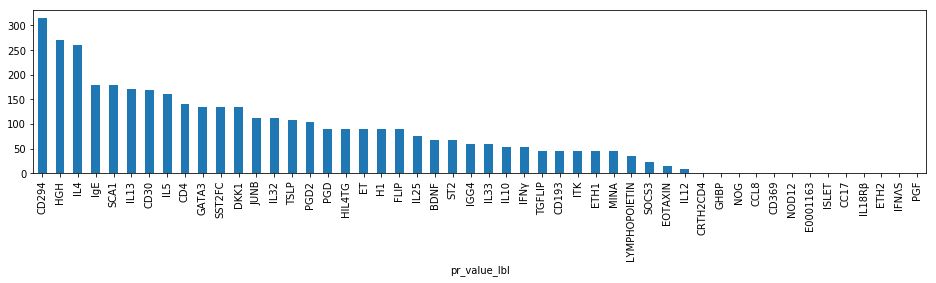

In [14]:
# cell_type = 'MAIT'
#cell_type = 'NKT'
#cell_type = 'TRM'
#cell_type = 'TSCM' # (TET, GLUT1, CD95)
#cell_type = 'TFH' # (CD185, CD267[TACI,TNFRSF13B], BCL6)
#cell_type = 'TREG1' # (IL10, LAG3, CD49b)
#cell_type = 'TN'
cell_type = 'TH2'
#cell_type = 'TFH17LIKE'
s_bar = df_pr_score.loc[cell_type].iloc[0].sort_values(ascending=False).head(50)
(s_bar - s_bar.min()).plot(kind='bar', figsize=(16, 3))

In [15]:
df[(df['ct_type_key'] == cell_type) & (df['pr_value_lbl'] == '25OHVD')].head()

,ct_type,ct_count,id,ct_type_key,ct_type_lbl,ct_type_lvl,pr_start,pr_end,pr_value,pr_class,pr_value_norm,pr_value_lbl,pr_value_sym,pub_abstract,pub_date,pub_terms,pub_title


In [16]:
df[df['pr_value_lbl'] == 'LIPOCALINTYPEPGDSYNTHASE'].head()

,ct_type,ct_count,id,ct_type_key,ct_type_lbl,ct_type_lvl,pr_start,pr_end,pr_value,pr_class,pr_value_norm,pr_value_lbl,pr_value_sym,pub_abstract,pub_date,pub_terms,pub_title


In [340]:
def get_score_mat(limit=None):
    return df_pr_score.stack().rename('value').reset_index()\
        .groupby(['ct_type_key', 'ct_type_lbl', 'ct_type_lvl'], group_keys=False)\
        .apply(lambda g: g.sort_values('value', ascending=False).head(limit)\
        .assign(rank=lambda df: np.arange(len(df)) + 1))\
        .groupby(['ct_type_key', 'ct_type_lbl', 'ct_type_lvl'], group_keys=False)\
        .apply(lambda g: g.assign(value_norm=g['value']/g['value'].sum()))

df_pr_top = get_score_mat(limit=10)
df_pr_top.head()

,ct_type_key,ct_type_lbl,ct_type_lvl,pr_value_lbl,value,rank,value_norm
3290,MAIT,Mucosal-associated Invariant T,1.0,MR1,1245.0,1,0.382841
4778,MAIT,Mucosal-associated Invariant T,1.0,TRAV1,675.0,2,0.207565
4985,MAIT,Mucosal-associated Invariant T,1.0,Vα7.2,360.0,3,0.110701
4779,MAIT,Mucosal-associated Invariant T,1.0,TRAV12,225.0,4,0.069188
692,MAIT,Mucosal-associated Invariant T,1.0,CD161,180.0,5,0.055351


In [341]:
df['pr_value_lbl'].nunique()

5147

In [342]:
df[df['pr_value_lbl'].str.contains('<|>')]['pr_value_lbl'].value_counts()

CD8α>DN    1
>TH2       1
I>DTR      1
CD4>DN     1
Name: pr_value_lbl, dtype: int64

## Visualization

In [345]:
df_pr_top['ct_type_key'].nunique()

45

In [20]:
df_pr_top.pivot(index='ct_type_key', columns='rank', values='pr_value_lbl')

rank,1,2,3,4,5,6,7,8,9,10
ct_type_key,,,,,,,,,,
MAIT,MR1,TRAV1,Vα7.2,TRAV12,CD161,PLZF,RRL6CH2OH,MHCI,MHCIB,MAITS
NKT,CD1D,CD355,Vβ11,Vα24,T1IFNβ,THPOK,PI9,CD56,KRN7000,Vα24CD161
OKT,ISG,γGLOBULIN,OKT8,OKT4,LT4,IgG,CSF,IgM,IgA,NHPMAITS
TC0,IFNγ,IL4,CD8,CD4,070,NIK,NK1R,NK1.1,NK1,NITRICOXIDESYNTHASE
TC1,IMP321,HSPE7,HPV16,E7,E6,HSP110,E71120,MHSP110,FOXP³,IMMUNOGLOBULINTCR
TC17,HSPC,IL17C,TC1,IL17S,IL17B,IL17D,OPC,IL17,IL17E,IL17A
TC2,125D3,PGD2,CYP11A1,ILT,CD294,IGLIKETRANSCRIPT,CD8TC2,PKC,CD3ζ,PGDSYNTHASE
TC9,IL9,STAT6,EOMES,CD8,IRF4,BET,TGFβ,FOXP3,IL10,IL4
TCM,CD4CTL,CD8T,E75G89,CD4CTLS,FOXO3A,CD122,SHP1,HBX,CD8,ANTICD28


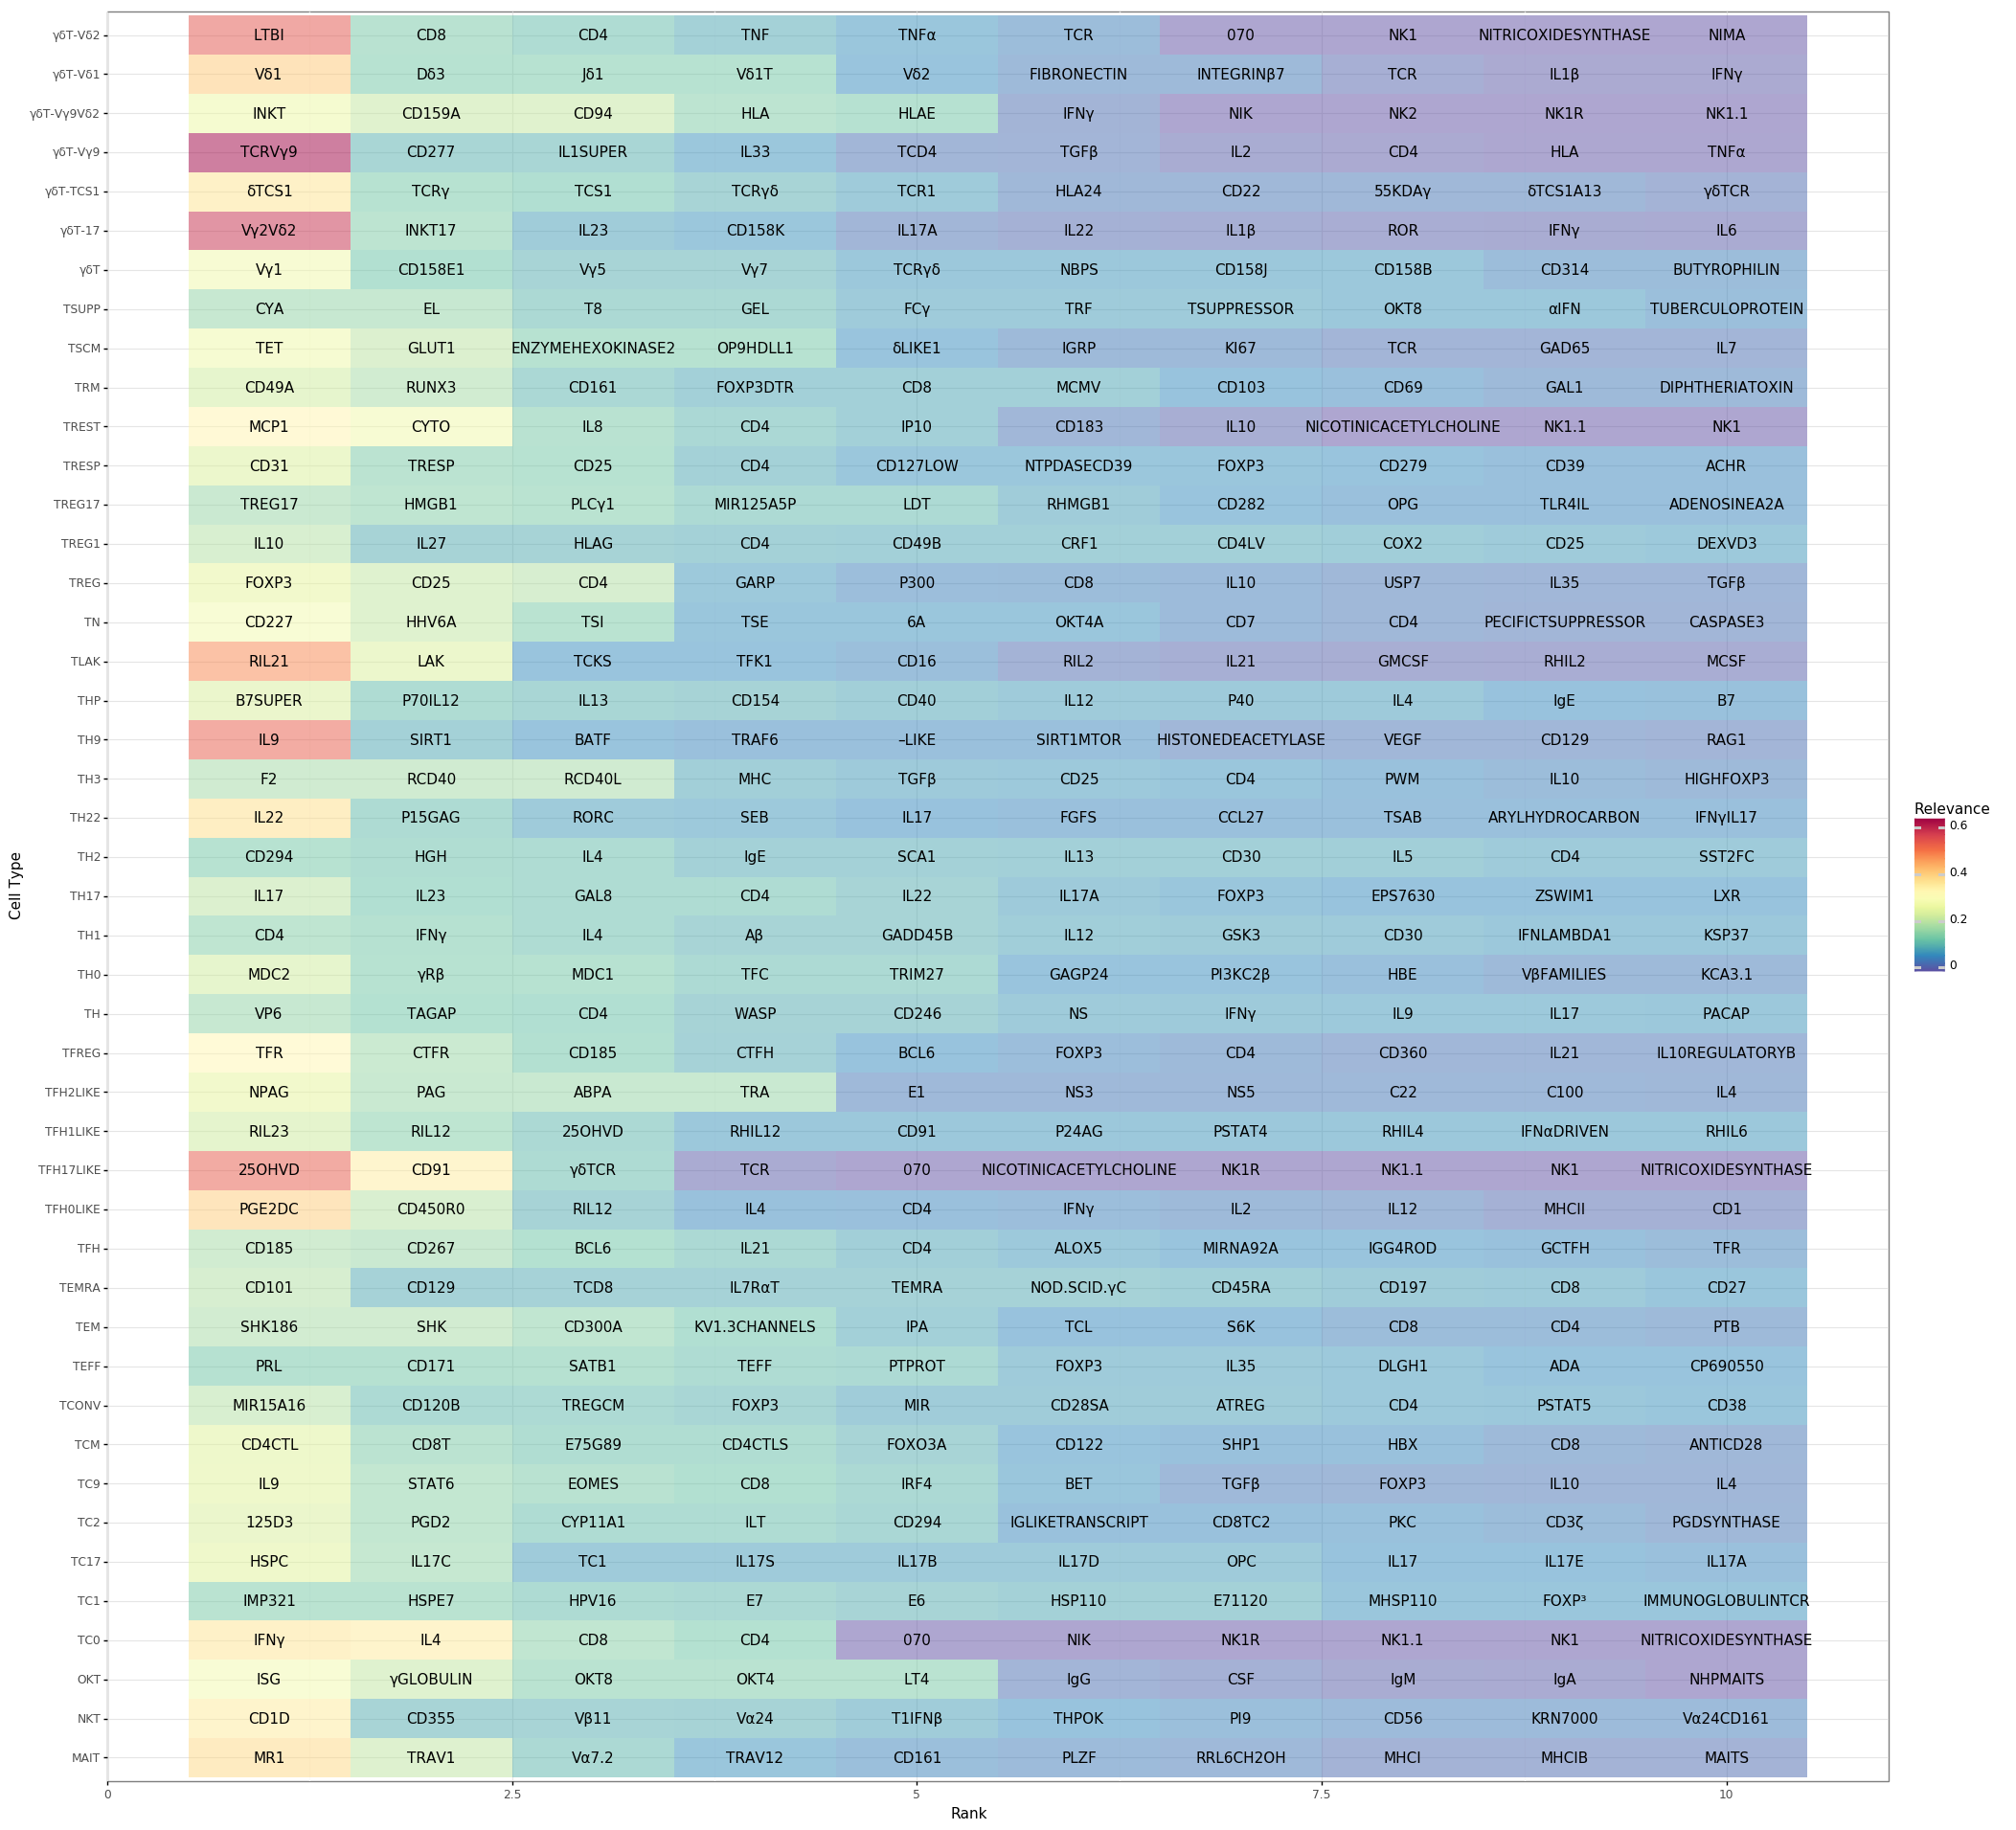

<ggplot: (305261064)>

In [21]:
(
    pn.ggplot(
        df_pr_top, 
        pn.aes(y='ct_type_key', x='rank', label='pr_value_lbl', fill='value_norm')
    ) + 
    pn.geom_tile(alpha=.5) + 
    pn.scale_fill_cmap('Spectral_r') +
    pn.geom_text(color='black', alpha=1) + 
    pn.labs(fill='Relevance', x='Rank', y='Cell Type') +
    pn.theme_bw() +
    pn.theme(figure_size=(24, 24)) 
)

In [22]:
pr_regex_primary = 'MAIT|TC\\d+|^TH\\d+|^TFH|NKT|TRM|TSCM|^TREG|^γδT$|γδT-17|γδT-TCS1|γδT-Vγ9|γδT-Vδ1'
plot_ct = df_pr_top[df_pr_top['ct_type_key'].str.contains(pr_regex_primary)]['ct_type_key'].unique()
df_pr_primary = df_pr_top.pipe(lambda df: df[df['ct_type_key'].isin(plot_ct)])

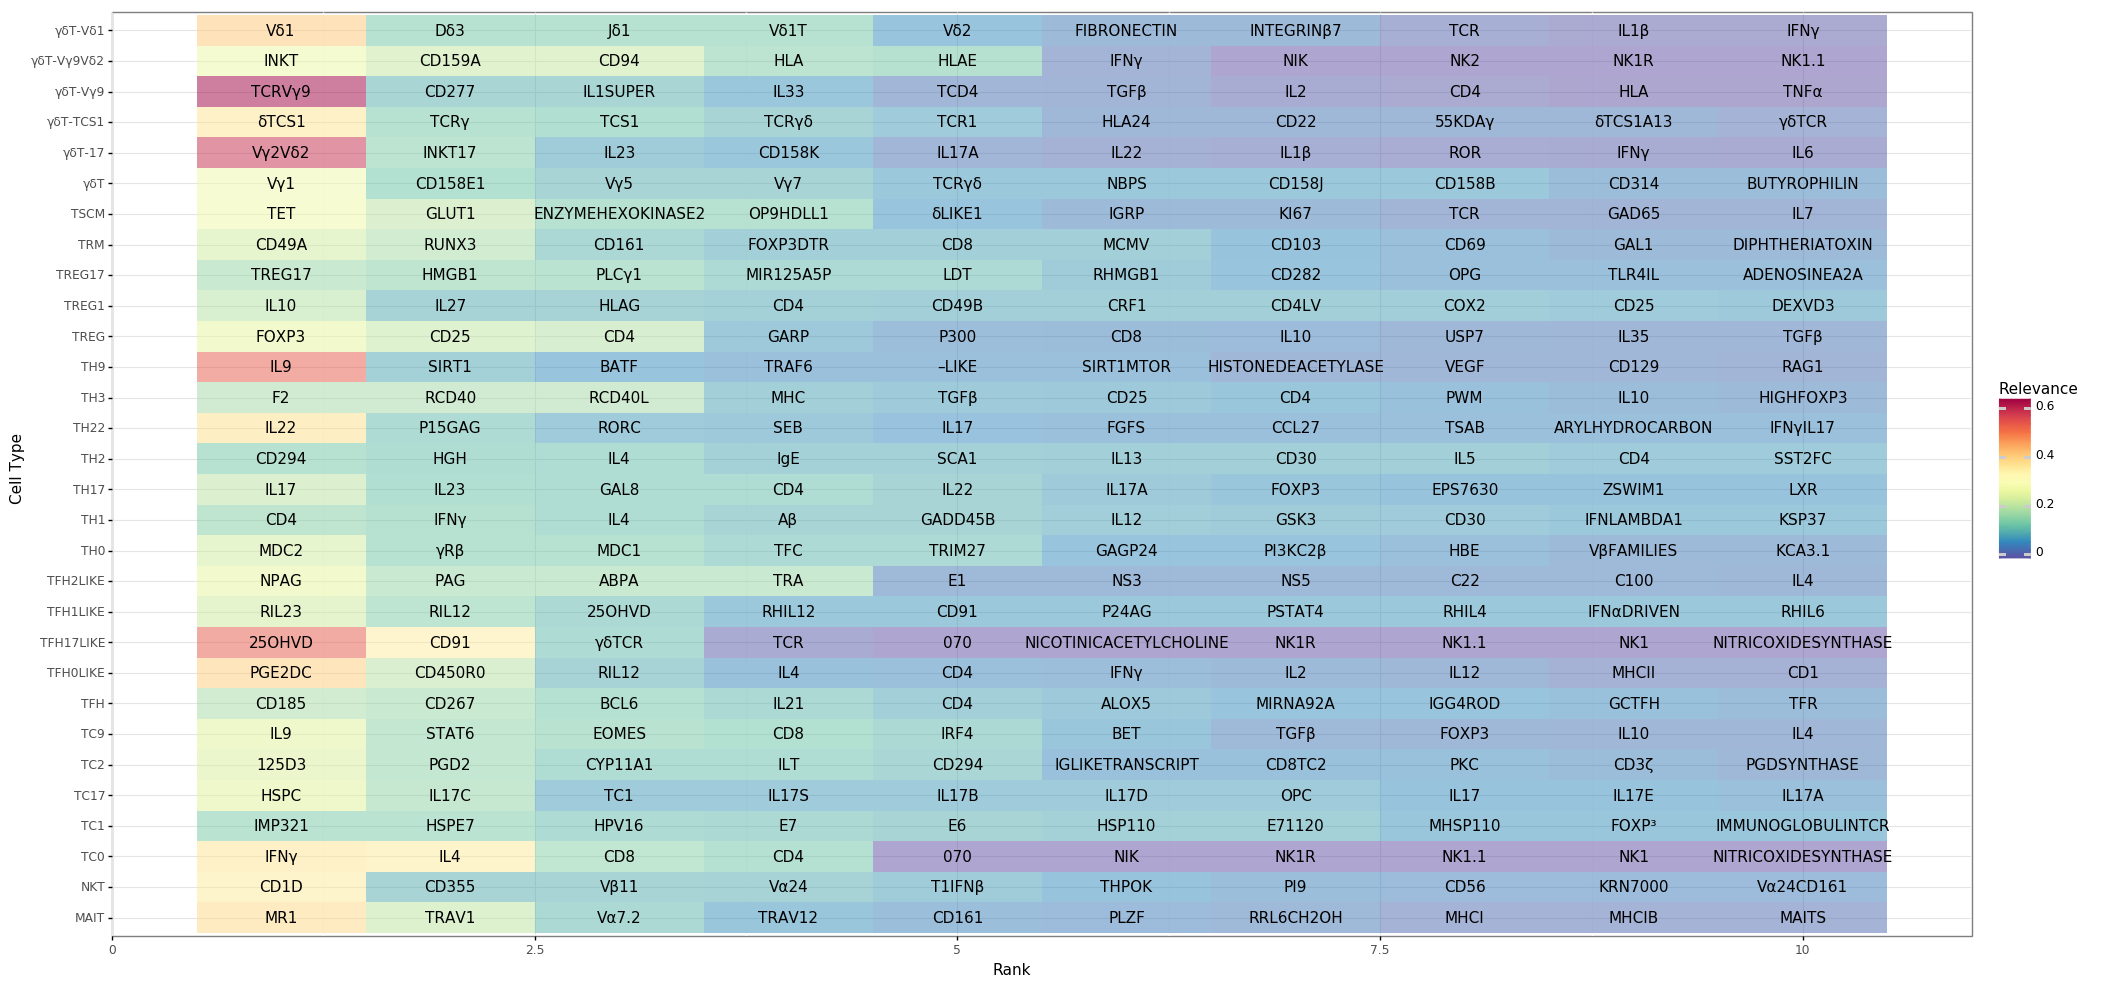

<ggplot: (-9223372036549528765)>

In [23]:
(
    pn.ggplot(
        df_pr_primary, 
        pn.aes(y='ct_type_key', x='rank', label='pr_value_lbl', fill='value_norm')
    ) + 
    pn.geom_tile(alpha=.5) + 
    pn.scale_fill_cmap('Spectral_r') +
    pn.geom_text(color='black', alpha=1) + 
    pn.labs(fill='Relevance', x='Rank', y='Cell Type') +
    pn.theme_bw() +
    pn.theme(figure_size=(24, 12)) 
)

In [264]:
# df_plt = df_pr_top.pivot_table(index='ct_type_key', columns='pr_value_lbl', values='value_norm')
# #sns.heatmap(df_plt, xticklabels=1, yticklabels=1, cmap='Spectral_r')
# sns.clustermap(df_plt.fillna(0), cmap='Spectral')
# plt.gcf().set_size_inches(36, 24)

## Rank-Ordered Listing

In [24]:
get_score_mat().head()

,ct_type_key,ct_type_lbl,ct_type_lvl,pr_value_lbl,value,rank,value_norm
3290,MAIT,Mucosal-associated Invariant T,1.0,MR1,1245.0,1,0.153004
4778,MAIT,Mucosal-associated Invariant T,1.0,TRAV1,675.0,2,0.082954
4985,MAIT,Mucosal-associated Invariant T,1.0,Vα7.2,360.0,3,0.044242
4779,MAIT,Mucosal-associated Invariant T,1.0,TRAV12,225.0,4,0.027651
692,MAIT,Mucosal-associated Invariant T,1.0,CD161,180.0,5,0.022121


In [25]:
(
    get_score_mat()
    .pipe(lambda df: df[df['ct_type_key'].str.contains(pr_regex_primary)])
    ['ct_type_key'].value_counts()
)

γδT-TCS1      5147
TC2           5147
TC9           5147
TC0           5147
MAIT          5147
TRM           5147
TH9           5147
TREG17        5147
TH3           5147
γδT           5147
TH2           5147
TH1           5147
TC1           5147
TREG1         5147
TFH1LIKE      5147
TFH2LIKE      5147
TH0           5147
γδT-Vγ9Vδ2    5147
TH22          5147
TFH           5147
TSCM          5147
TFH17LIKE     5147
NKT           5147
γδT-17        5147
γδT-Vγ9       5147
TC17          5147
γδT-Vδ1       5147
TREG          5147
TH17          5147
TFH0LIKE      5147
Name: ct_type_key, dtype: int64

In [26]:
assert df_fr.groupby(['exp_id', 'pr_value_lbl']).size().max() == 1
ro_max_rank = 10
df_pr_ro = (
    get_score_mat()
    .pipe(lambda df: df[df['ct_type_key'].str.contains(pr_regex_primary)])
    .pipe(lambda df: pd.merge(df, df_fr, on='pr_value_lbl', how='outer'))
    .groupby(['pr_value_lbl'])
    .apply(lambda g: pd.Series({
        'pm_max_rel': g['value_norm'].max(),
        'panel_names': g['exp_lbl'].drop_duplicates().str.cat(sep='|'),
        'cell_types': g[g['rank'] <= ro_max_rank].sort_values('rank')['ct_type_key'].drop_duplicates().str.cat(sep='|'),
        'panel_name_ct': g['exp_name'].nunique(),
        'cell_type_ct': len(g[g['rank'] <= ro_max_rank].sort_values('rank')['ct_type_key'].drop_duplicates())
    }))
    .sort_values('panel_name_ct', ascending=False)
)
df_pr_ro.head()

,pm_max_rel,panel_names,cell_types,panel_name_ct,cell_type_ct
pr_value_lbl,,,,,
CD3,0.022312,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,,20,0
CD8,0.151769,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TC0|TC9|TRM|TREG,19,4
CD4,0.129559,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TH1|TREG|TREG1|TH17|TC0|TFH|TFH0LIKE|TH3|γδT-V...,18,10
CD45RA,0.006269,OMIP:016|OMIP:021|OMIP:024|OMIP:025|OMIP:030|O...,,11,0
CD197,0.007523,OMIP:021|OMIP:022|OMIP:024|OMIP:025|OMIP:030|O...,,10,0


In [31]:
# df_pr_ro['panel_names'].str.split('|', expand=True).stack().value_counts()

In [27]:
df_pr_ro.sort_values(['panel_name_ct', 'pm_max_rel'], ascending=False).head(10)

,pm_max_rel,panel_names,cell_types,panel_name_ct,cell_type_ct
pr_value_lbl,,,,,
CD3,0.022312,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,,20,0
CD8,0.151769,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TC0|TC9|TRM|TREG,19,4
CD4,0.129559,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TH1|TREG|TREG1|TH17|TC0|TFH|TFH0LIKE|TH3|γδT-V...,18,10
CD45RA,0.006269,OMIP:016|OMIP:021|OMIP:024|OMIP:025|OMIP:030|O...,,11,0
CD197,0.007523,OMIP:021|OMIP:022|OMIP:024|OMIP:025|OMIP:030|O...,,10,0
IFNγ,0.364544,OMIP:014|OMIP:016|OMIP:025|OMIP:035|CYTOF:FR-F...,TC0|TH1|TFH0LIKE|γδT-Vγ9Vδ2|γδT-17|γδT-Vδ1,9,6
CD38,0.025864,OMIP:023|OMIP:024|OMIP:030|CYTOF:FR-FCM-ZZTJ|C...,,9,0
CD56,0.013373,OMIP:024|OMIP:025|OMIP:028|OMIP:035|OMIP:037|C...,NKT,9,1
IL2,0.038572,OMIP:014|OMIP:016|OMIP:022|OMIP:025|CYTOF:FR-F...,TFH0LIKE|γδT-Vγ9,8,2


In [28]:
path = osp.join(DATA_DIR, 'pubmed_ordered_proteins.csv')
df_pr_ro.reset_index().to_csv(path, index=False)
path

'/Users/eczech/tmp/nlp/data/pubmed_ordered_proteins.csv'

### Clustering Documents

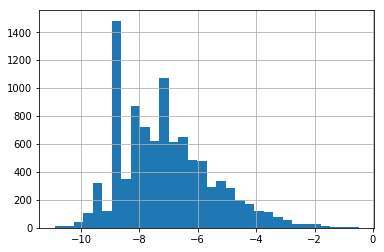

In [241]:
def normalize_scores(df):
    return df.div(df.sum(axis=1).values, axis=0)
cts = normalize_scores(df_pr_score).stack()
cts = cts[cts > 0].apply(np.log)
cts.hist(bins=32)

In [248]:
high_rel_thresh = cts.quantile(q=.85)
print('Threshold:', high_rel_thresh)
high_rel_pr = cts[cts > high_rel_thresh].index.get_level_values('pr_value_lbl').unique()
print('Num proteins:', len(high_rel_pr))

Threshold: -5.350765722313784
Num proteins: 1049


In [260]:
df_cor_mat = df.groupby(['id', 'pr_value_lbl']).size().rename('exists').reset_index().assign(exists=1)\
    .pivot_table(index='id', columns='pr_value_lbl', values='exists')
df_cor_mat.head()

pr_value_lbl,070,1.92±0.32,10,10TITIN,11PROTEINKINASES,125D3,125DIHYDROXYVITAMINDHYDROXYLASE,125VITD3,1512C,16KDα,...,δEXON2,δLIKE1,δTCS1,δTCS1A13,κB,–LIKE,↑IL17A,∼30%,∼3040%,∼92
id,,,,,,,,,,,,,,,,,,,,,
1295331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df_cor_mat[high_rel_pr].T.shape

(1049, 5474)

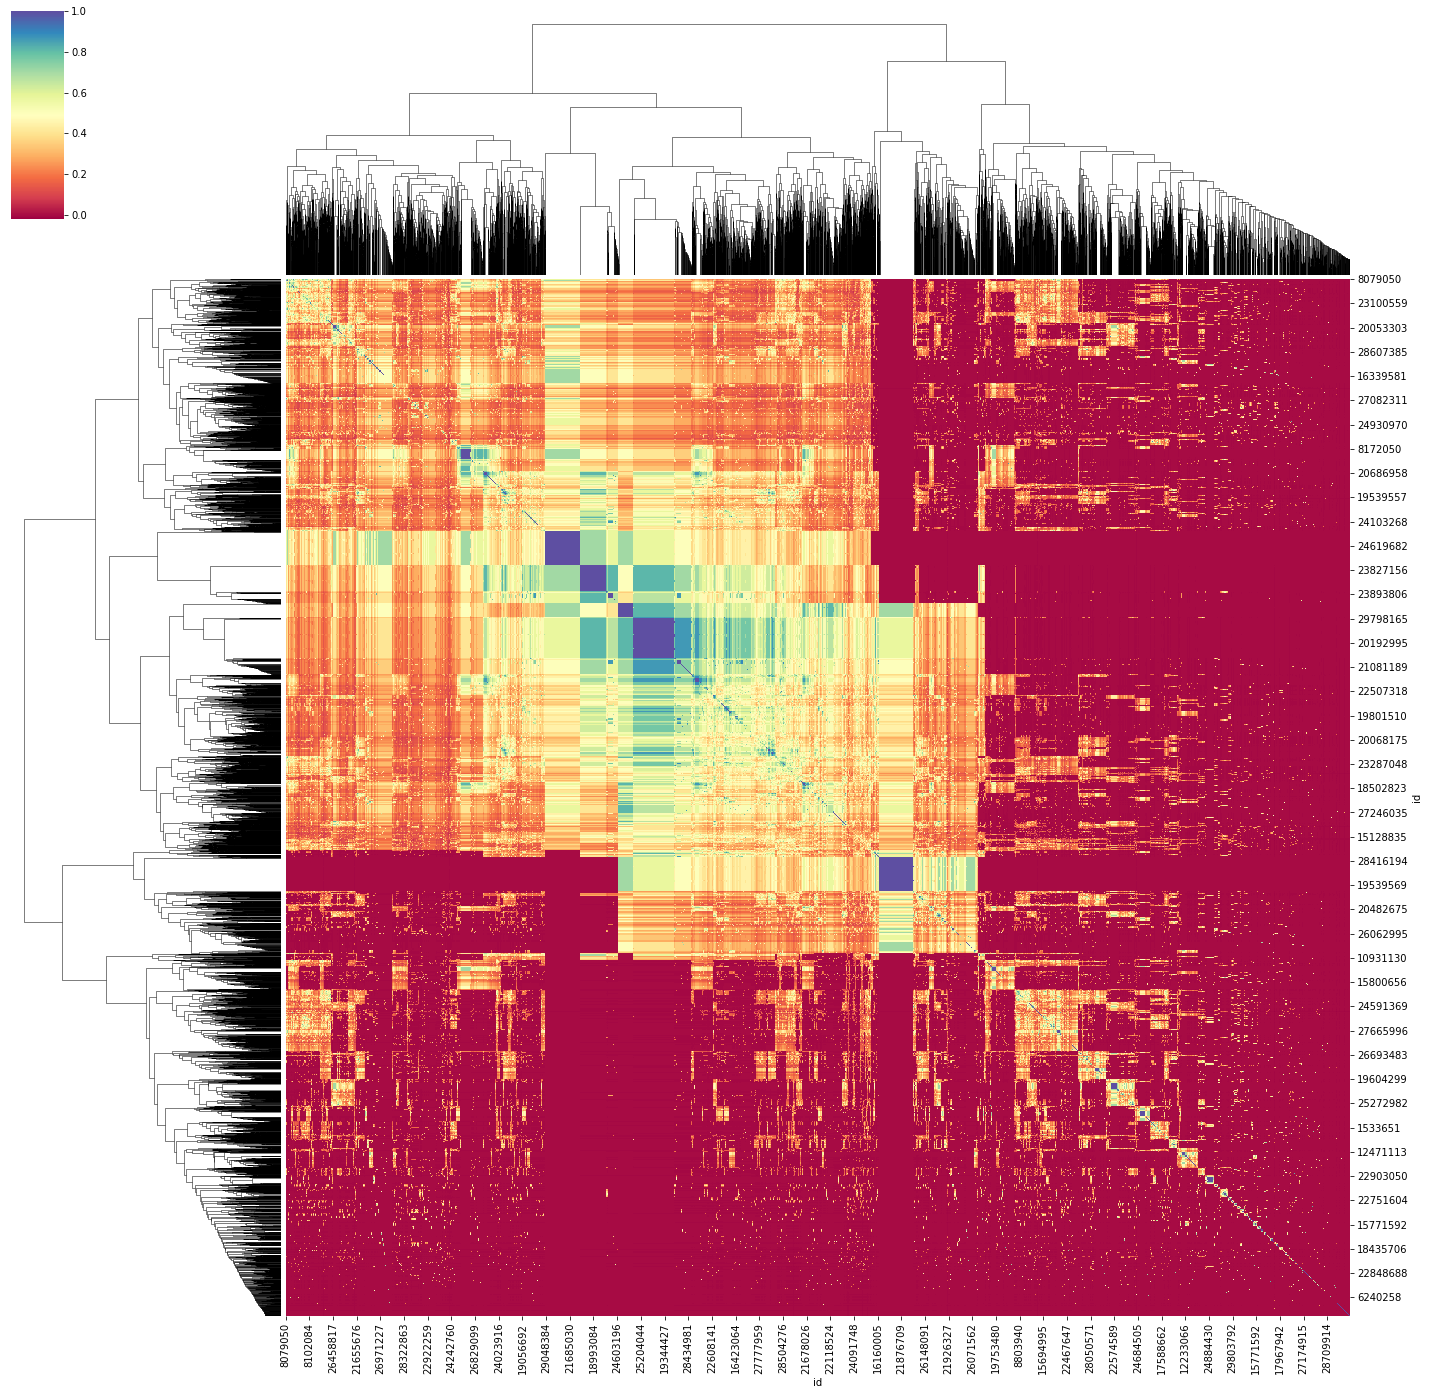

In [263]:
sns.clustermap(
    df_cor_mat[high_rel_pr].T
        .dropna(axis='columns', how='all').dropna(axis='rows', how='all')
        .notnull().astype(int)
        .corr(method='pearson'), 
    cmap='Spectral'
)
plt.gcf().set_size_inches(24, 24)

## Parse Visualization

In [37]:
from IPython.core.getipython import get_ipython
ip = get_ipython()
ip.config['IPKernelApp']['parent_appname'] = 'notebook'

In [238]:
df_ct[df_ct['type'].isin(['TRM'])].sort_values(['count'], ascending=False).head(8)

,type,count,id,type_key,type_lbl,type_lvl
1324,TRM,4,27317751,TRM,Tissue Resident Memory,1.0
379,TRM,2,29211713,TRM,Tissue Resident Memory,1.0
101,TRM,2,29500823,TRM,Tissue Resident Memory,1.0
679,TRM,2,28628092,TRM,Tissue Resident Memory,1.0
715,TRM,1,28674001,TRM,Tissue Resident Memory,1.0
804,TRM,1,28475283,TRM,Tissue Resident Memory,1.0
902,TRM,1,27804207,TRM,Tissue Resident Memory,1.0
1079,TRM,1,28214226,TRM,Tissue Resident Memory,1.0


In [ ]:
# 9725214 - non appositive
# 29211713 - TRM TF and CD8
# 28628092 - Decent TRM references

In [270]:
pub_id = 28214226
df_ct[df_ct['id'] == pub_id]

,type,count,id,type_key,type_lbl,type_lvl
1078,T,1,28214226,NaN,NaN,NaN
1079,TRM,1,28214226,TRM,Tissue Resident Memory,1.0


In [271]:
pr_spans = df_pr[df_pr['id'] == pub_id]
pr_spans

,id,start,end,value,class,value_norm,value_lbl,value_sym
6229,28214226,0,5,CD49a,protein,CD49A,CD49A,ITGA1
6230,28214226,41,44,CD8,protein,CD8,CD8,CD8A
6231,28214226,241,246,CD49a,protein,CD49A,CD49A,ITGA1
6232,28214226,279,282,CD8,protein,CD8,CD8,CD8A
6233,28214226,124,127,CD8,protein,CD8,CD8,CD8A
6234,28214226,156,168,interferon-γ,protein,IFNγ,IFNγ,NaN
6235,28214226,178,181,CD8,protein,CD8,CD8,CD8A
6236,28214226,183,189,CD49a-,protein,CD49A,CD49A,ITGA1
6237,28214226,211,225,interleukin-17,protein,IL17,IL17,NaN
6238,28214226,227,232,IL-17,protein,IL17,IL17,NaN


In [272]:
df_pub[df_pub['id'] == pub_id].iloc[0]['abstract']

'Tissue-resident memory T (Trm) cells form a heterogeneous population that provides localized protection against pathogens. Here, we identify CD49a as\xa0a marker that differentiates CD8<sup>+</sup> Trm cells on a compartmental and functional basis. In human skin epithelia, CD8<sup>+</sup>CD49a<sup>+</sup> Trm cells produced interferon-γ, whereas CD8<sup>+</sup>CD49a<sup>-</sup> Trm cells produced interleukin-17 (IL-17). In addition, CD8<sup>+</sup>CD49a<sup>+</sup> Trm cells from healthy skin rapidly induced the expression of the effector molecules perforin and granzyme B when stimulated with IL-15, thereby promoting a strong cytotoxic response. In skin from patients with vitiligo, where melanocytes are eradicated locally, CD8<sup>+</sup>CD49a<sup>+</sup> Trm cells that constitutively expressed perforin and granzyme B accumulated both in the epidermis and dermis. Conversely, CD8<sup>+</sup>CD49a<sup>-</sup> Trm cells from psoriasis lesions predominantly generated IL-17 responses that 

In [273]:
from spacy import displacy
from IPython.core.display import display, HTML

In [296]:
pr_spans.sort_values('start')

,id,start,end,value,class,value_norm,value_lbl,value_sym
6229,28214226,0,5,CD49a,protein,CD49A,CD49A,ITGA1
6230,28214226,41,44,CD8,protein,CD8,CD8,CD8A
6233,28214226,124,127,CD8,protein,CD8,CD8,CD8A
6234,28214226,156,168,interferon-γ,protein,IFNγ,IFNγ,NaN
6235,28214226,178,181,CD8,protein,CD8,CD8,CD8A
6236,28214226,183,189,CD49a-,protein,CD49A,CD49A,ITGA1
6237,28214226,211,225,interleukin-17,protein,IL17,IL17,NaN
6238,28214226,227,232,IL-17,protein,IL17,IL17,NaN
6231,28214226,241,246,CD49a,protein,CD49A,CD49A,ITGA1
6232,28214226,279,282,CD8,protein,CD8,CD8,CD8A


In [333]:
# Example (from 28214226)
text = "Tissue-resident memory T (Trm) cells form a heterogeneous population that provides localized protection against pathogens. Here, we identify CD49a as a marker that differentiates CD8+ Trm cells on a compartmental and functional basis. In human skin epithelia, CD8+ CD49a+ Trm cells produced interferon-γ, whereas CD8+ CD49a- Trm cells produced interleukin-17 (IL-17)"
doc = {
    'text': text,
    'ents': [
        {'start': 26, 'end': 29, 'label': 'TYPE'},
        {'start': 141, 'end': 146, 'label': 'PROTEIN'},
        {'start': 179, 'end': 182, 'label': 'PROTEIN'},
        {'start': 259, 'end': 263, 'label': 'PROTEIN'},
        {'start': 291, 'end': 303, 'label': 'PROTEIN'},
        {'start': 313, 'end': 316, 'label': 'PROTEIN'},
        {'start': 318, 'end': 324, 'label': 'PROTEIN'},
        {'start': 344, 'end': 358, 'label': 'PROTEIN'},
        {'start': 360, 'end': 365, 'label': 'PROTEIN'},
    ],
    'title': None
}
colors = {'TYPE': '#09a3d5', 'PROTEIN': '#05b083'}
options = {'ents': ['TYPE', 'PROTEIN'], 'colors': colors}
html = displacy.render(doc, style='ent', manual=True, options=options)
display(HTML(html))